In [2]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_reg_coef(df):
    df = df[df['metric'] == 'avg_reg_coef']
    return df.drop(columns='metric')

df = load_reg_coef(catalog.load('map_model_contribution_scores'))
df

[06/07/24 12:47:41] INFO     Loading data from 'map_model_contribution_scores' (CSVDataSet)...  ]8;id=320790;file:///Users/tony/anaconda3/envs/sst-rdex/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=468410;file:///Users/tony/anaconda3/envs/sst-rdex/lib/python3.10/site-packages/kedro/io/data_catalog.py#345\345]8;;\

,target,condition,lh_0,lh_1,lh_10,lh_100,lh_1000,lh_10000,lh_10001,lh_10002,...,rh_9990,rh_9991,rh_9992,rh_9993,rh_9994,rh_9995,rh_9996,rh_9997,rh_9998,rh_9999
4,B,correct_go,0.000257,0.000004,0.000125,-0.000130,-0.000404,0.000319,-0.000036,-0.000362,...,-0.000062,-0.000003,-0.000011,-0.000473,0.000176,-1.700864e-04,-0.000210,-0.000170,-0.000051,-0.000404
5,B,correct_stop,-0.000105,0.000089,0.000107,-0.000040,0.000192,0.000233,0.000105,-0.000229,...,-0.000269,-0.000126,0.000075,-0.000126,-0.000455,-2.784332e-04,-0.000002,-0.000105,-0.000273,-0.000231
6,B,incorrect_go,-0.000754,-0.000056,0.000303,0.000192,0.000187,-0.000638,-0.000621,-0.000415,...,0.000185,0.000136,0.000085,0.000113,-0.000227,-3.839681e-04,-0.000303,-0.000352,-0.000372,-0.000587
7,B,incorrect_stop,0.000176,-0.000084,0.000225,0.000165,-0.000326,0.000137,0.000028,-0.000210,...,-0.000283,-0.000176,-0.000059,-0.000291,-0.000139,-2.753256e-04,-0.000056,-0.000217,-0.000213,-0.000152
16,EEA,correct_go,-0.000145,0.000403,0.000004,-0.000279,0.000144,0.000341,0.000168,0.000270,...,0.000276,0.000326,0.000381,0.000354,-0.000089,-1.785311e-04,-0.000485,-0.000410,0.000021,-0.000191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,vF,incorrect_stop,-0.000257,-0.000072,-0.000317,0.000179,0.000083,-0.000218,-0.000284,-0.000353,...,-0.000107,-0.000050,-0.000007,0.000057,0.000215,9.401251e-05,0.000264,0.000408,0.000403,0.000315
196,vT,correct_go,-0.000149,0.000004,-0.000080,-0.000393,0.000046,0.000196,0.000012,-0.000115,...,0.000132,0.000254,0.000392,0.000214,0.000231,-3.624763e-07,-0.000273,-0.000311,-0.000122,-0.000198
197,vT,correct_stop,0.000255,0.000072,-0.000203,-0.000337,0.000067,0.000565,0.000340,0.000357,...,0.000002,-0.000267,0.000190,0.000270,-0.000320,-1.779427e-05,-0.000012,0.000250,-0.000011,-0.000019
198,vT,incorrect_go,-0.001165,0.000616,-0.000213,-0.000174,-0.000026,0.000012,-0.000165,-0.000044,...,0.000178,0.000290,0.000211,0.000214,-0.000318,-3.132047e-04,-0.000280,-0.000422,-0.000395,-0.000340


In [4]:
def create_correlation_df(df: pd.DataFrame, columns: str, index: list) -> pd.DataFrame:

    df_long = df.melt(id_vars = ['target', 'condition'])
    df = df_long.pivot(columns=columns, index=index)

    df.columns = df.columns.to_flat_index()
    df.columns = [c[1] for c in df.columns]

    return df

In [5]:
conditions = create_correlation_df(df, columns='condition', index=['target', 'variable'])
conditions

correct_go  correct_stop  incorrect_go  incorrect_stop
target variable                                                          
B      lh_0      2.565766e-04     -0.000105     -0.000754        0.000176
       lh_1      4.461256e-06      0.000089     -0.000056       -0.000084
       lh_10     1.245842e-04      0.000107      0.000303        0.000225
       lh_100   -1.300827e-04     -0.000040      0.000192        0.000165
       lh_1000  -4.040209e-04      0.000192      0.000187       -0.000326
...                       ...           ...           ...             ...
vT     rh_9995  -3.624763e-07     -0.000018     -0.000313        0.000185
       rh_9996  -2.730573e-04     -0.000012     -0.000280       -0.000131
       rh_9997  -3.105560e-04      0.000250     -0.000422       -0.000227
       rh_9998  -1.215595e-04     -0.000011     -0.000395       -0.000241
       rh_9999  -1.976196e-04     -0.000019     -0.000340        0.000126

[313242 rows x 4 columns]

In [6]:
parameters = create_correlation_df(df, columns='target', index=['condition', 'variable'])
parameters

B       EEA          SSRT  correct_go_mrt  \
condition      variable                                                     
correct_go     lh_0      0.000257 -0.000145  3.189035e-06        0.070755   
               lh_1      0.000004  0.000403 -2.013986e-06        0.009118   
               lh_10     0.000125  0.000004  3.979132e-06        0.018601   
               lh_100   -0.000130 -0.000279  2.144890e-06        0.004243   
               lh_1000  -0.000404  0.000144  3.536119e-07       -0.071417   
...                           ...       ...           ...             ...   
incorrect_stop rh_9995  -0.000275  0.000226  7.724953e-06       -0.060070   
               rh_9996  -0.000056 -0.000509  1.048920e-05       -0.002589   
               rh_9997  -0.000217 -0.000831  6.101647e-06       -0.026246   
               rh_9998  -0.000213 -0.000891  1.010998e-05       -0.009941   
               rh_9999  -0.000152 -0.000239  3.414257e-06       -0.027071   

                         correct_go_rt  correct_go_stdrt        gf     issrt  \
condition      variable                                                        
correct_go     lh_0          -0.000014          0.007771  0.000154 -0.000033   
               lh_1           0.000040          0.000179 -0.000096 -0.000052   
               lh_10         -0.000007          0.001822  0.000045 -0.000022   
               lh_100        -0.000038          0.010259  0.000238 -0.000006   
               lh_1000        0.000028         -0.004775 -0.000152  0.000014   
...                                ...               ...       ...       ...   
incorrect_stop rh_9995       -0.000013         -0.011258  0.000049  0.000037   
               rh_9996       -0.000082         -0.002073  0.000222  0.000065   
               rh_9997       -0.000088          0.001221  0.000197  0.000071   
               rh_9998       -0.000106          0.000215  0.000261  0.000057   
               rh_9999       -0.000053         -0.011710  0.000055 -0.000016   

                                k            mu         sigma            t0  \
condition      variable                                                       
correct_go     lh_0     -0.000092  1.859487e-06 -8.041425e-07 -6.690383e-07   
               lh_1      0.000119 -2.997376e-07 -6.463121e-06  2.370340e-07   
               lh_10     0.000102  4.577667e-06 -8.295321e-07 -1.600375e-06   
               lh_100    0.000073  5.442512e-07  1.389665e-06 -2.391298e-06   
               lh_1000  -0.000056 -1.845023e-06  1.149232e-05 -3.702460e-06   
...                           ...           ...           ...           ...   
incorrect_stop rh_9995   0.000269  5.792657e-06  1.875190e-06  2.511981e-06   
               rh_9996   0.000211  7.486597e-06  1.172090e-06  2.598216e-06   
               rh_9997   0.000180  3.426321e-06  1.319448e-06  3.600864e-07   
               rh_9998   0.000091  7.415177e-06  9.251872e-06  2.784195e-06   
               rh_9999   0.000024  1.505708e-06  5.209391e-06  4.784083e-06   

                                  tau        tf        v0        vF        vT  
condition      variable                                                        
correct_go     lh_0      1.932876e-06 -0.000315  0.000035 -0.000031 -0.000149  
               lh_1     -9.947706e-07 -0.000765  0.000004 -0.000349  0.000004  
               lh_10    -3.420322e-07 -0.000070  0.000033 -0.000064 -0.000080  
               lh_100    1.562831e-06  0.000277 -0.000086 -0.000154 -0.000393  
               lh_1000   2.390027e-06  0.000127  0.000036 -0.000039  0.000046  
...                               ...       ...       ...       ...       ...  
incorrect_stop rh_9995   1.254677e-06 -0.000007  0.000111  0.000094  0.000185  
               rh_9996   2.787069e-06  0.000449  0.000006  0.000264 -0.000131  
               rh_9997   2.054255e-06  0.001158  0.000096  0.000408 -0.000227  
               rh_9998   1.823507e-06  0.000699  0.000045  0.000403 -0.000241  
 

In [7]:
def make_parameter_correlation_matrix(df, columns, index):

    drop_cond = ['correct_go_mrt', 'correct_go_rt', 'correct_go_stdrt', 'issrt']
    df = create_correlation_df(df, columns=columns, index=index)
    out = (df
        .reset_index()
        .set_index('variable')
    )

    if columns == 'target':
        out = out.drop(columns=drop_cond)
    elif columns == "condition":
        out = out[~out['target'].isin(drop_cond)]

    out = (out
        .groupby(index[0])
        .corr()
        .reset_index(names=[index[0], columns])
        .set_index(columns)
    )
    return out.groupby(index[0])


len(make_parameter_correlation_matrix(df, columns='condition', index=['target', 'variable']))
# make_parameter_correlation_matrix(df, columns='target', index=['condition', 'variable'])



13

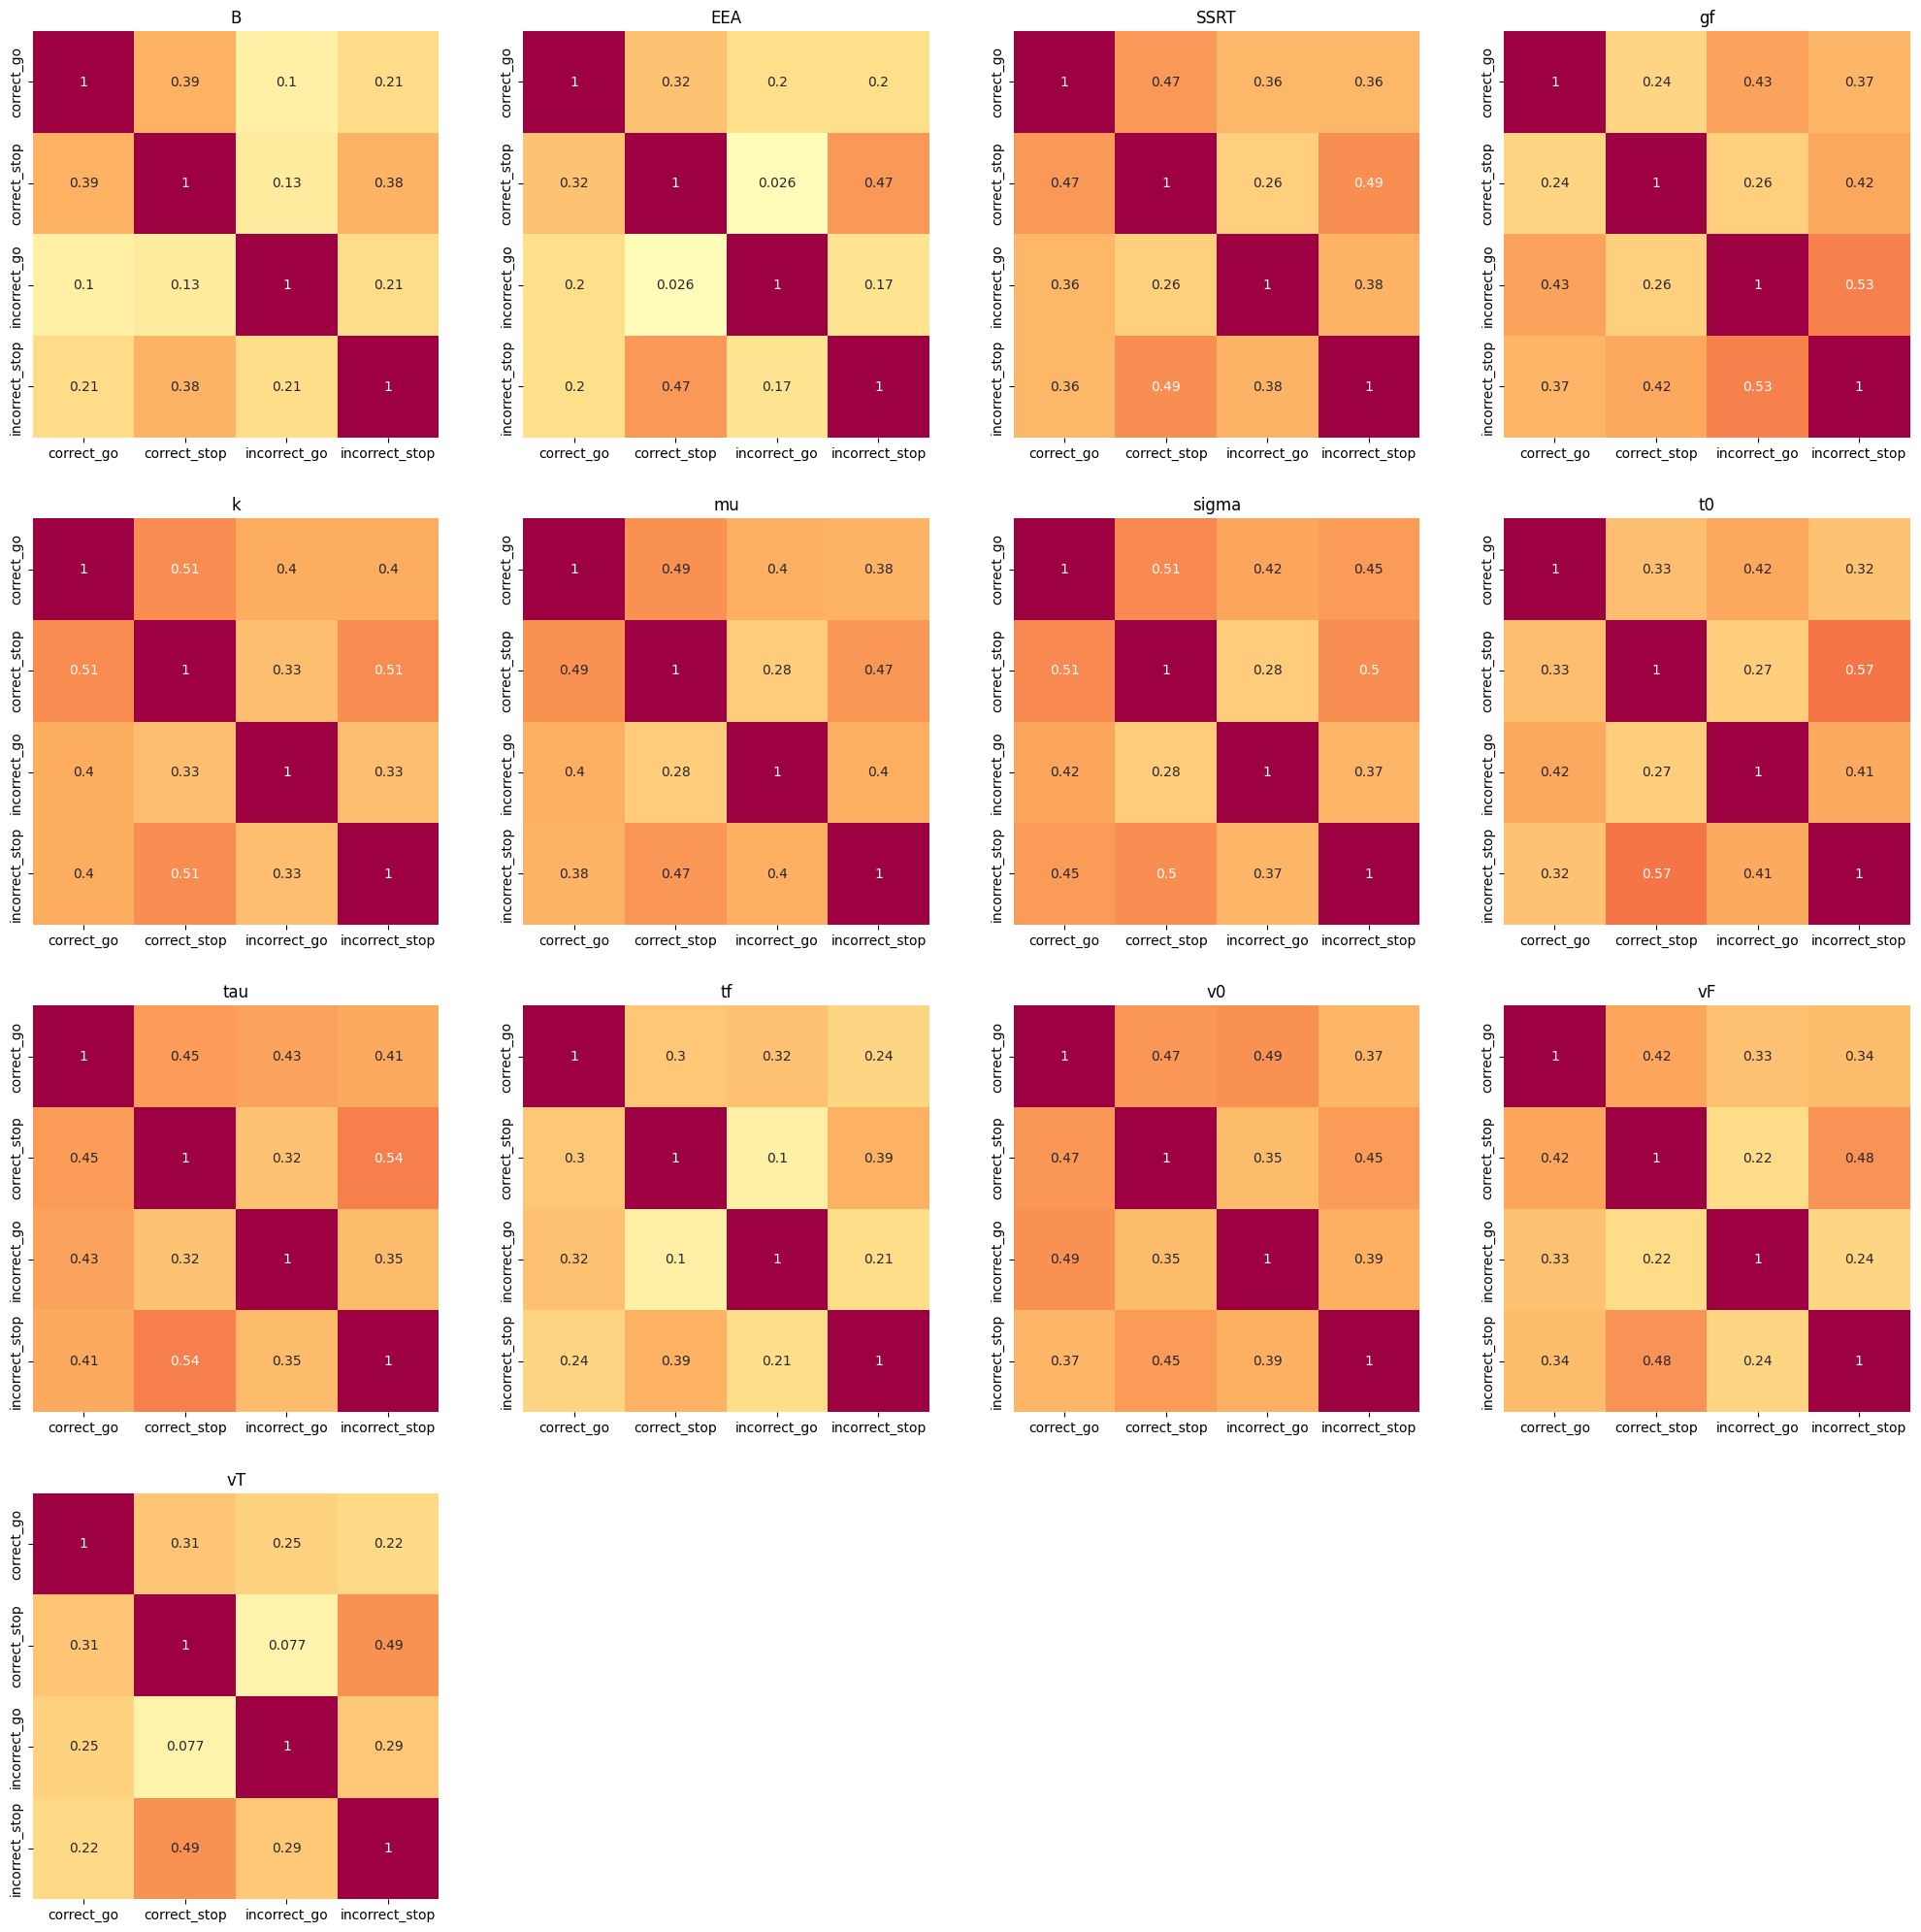

In [8]:
def make_brainmap_correlation_plot(df, columns, index, cmap='Spectral_r', ncols=4, nrows=4, figsize=(25, 25)):
    grouped = make_parameter_correlation_matrix(df, columns, index)

    n_plots = len(grouped)

    if n_plots % 2 == 0:
        ncols = nrows = int(n_plots / 2)
        
    n_grid = ncols * nrows

    vmin, vmax = -1, 1
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)

    for g, ax in zip(grouped, axs.flat):
        condition = g[0]
        to_plot = g[1].drop(columns=index[0])
        
        sns.heatmap(
            to_plot, 
            vmin=vmin,
            vmax=vmax, 
            cmap=cmap,
            cbar=False, 
            annot=True,
            square=True,
            ax=ax
        )
        ax.set_ylabel('')
        ax.set_title(condition)

    # make blank subplots if size of grid > # plots
    for i in range(n_plots, n_grid):
        axs.flat[i].axis('off')

        
make_brainmap_correlation_plot(df, columns='condition', index=['target', 'variable'])


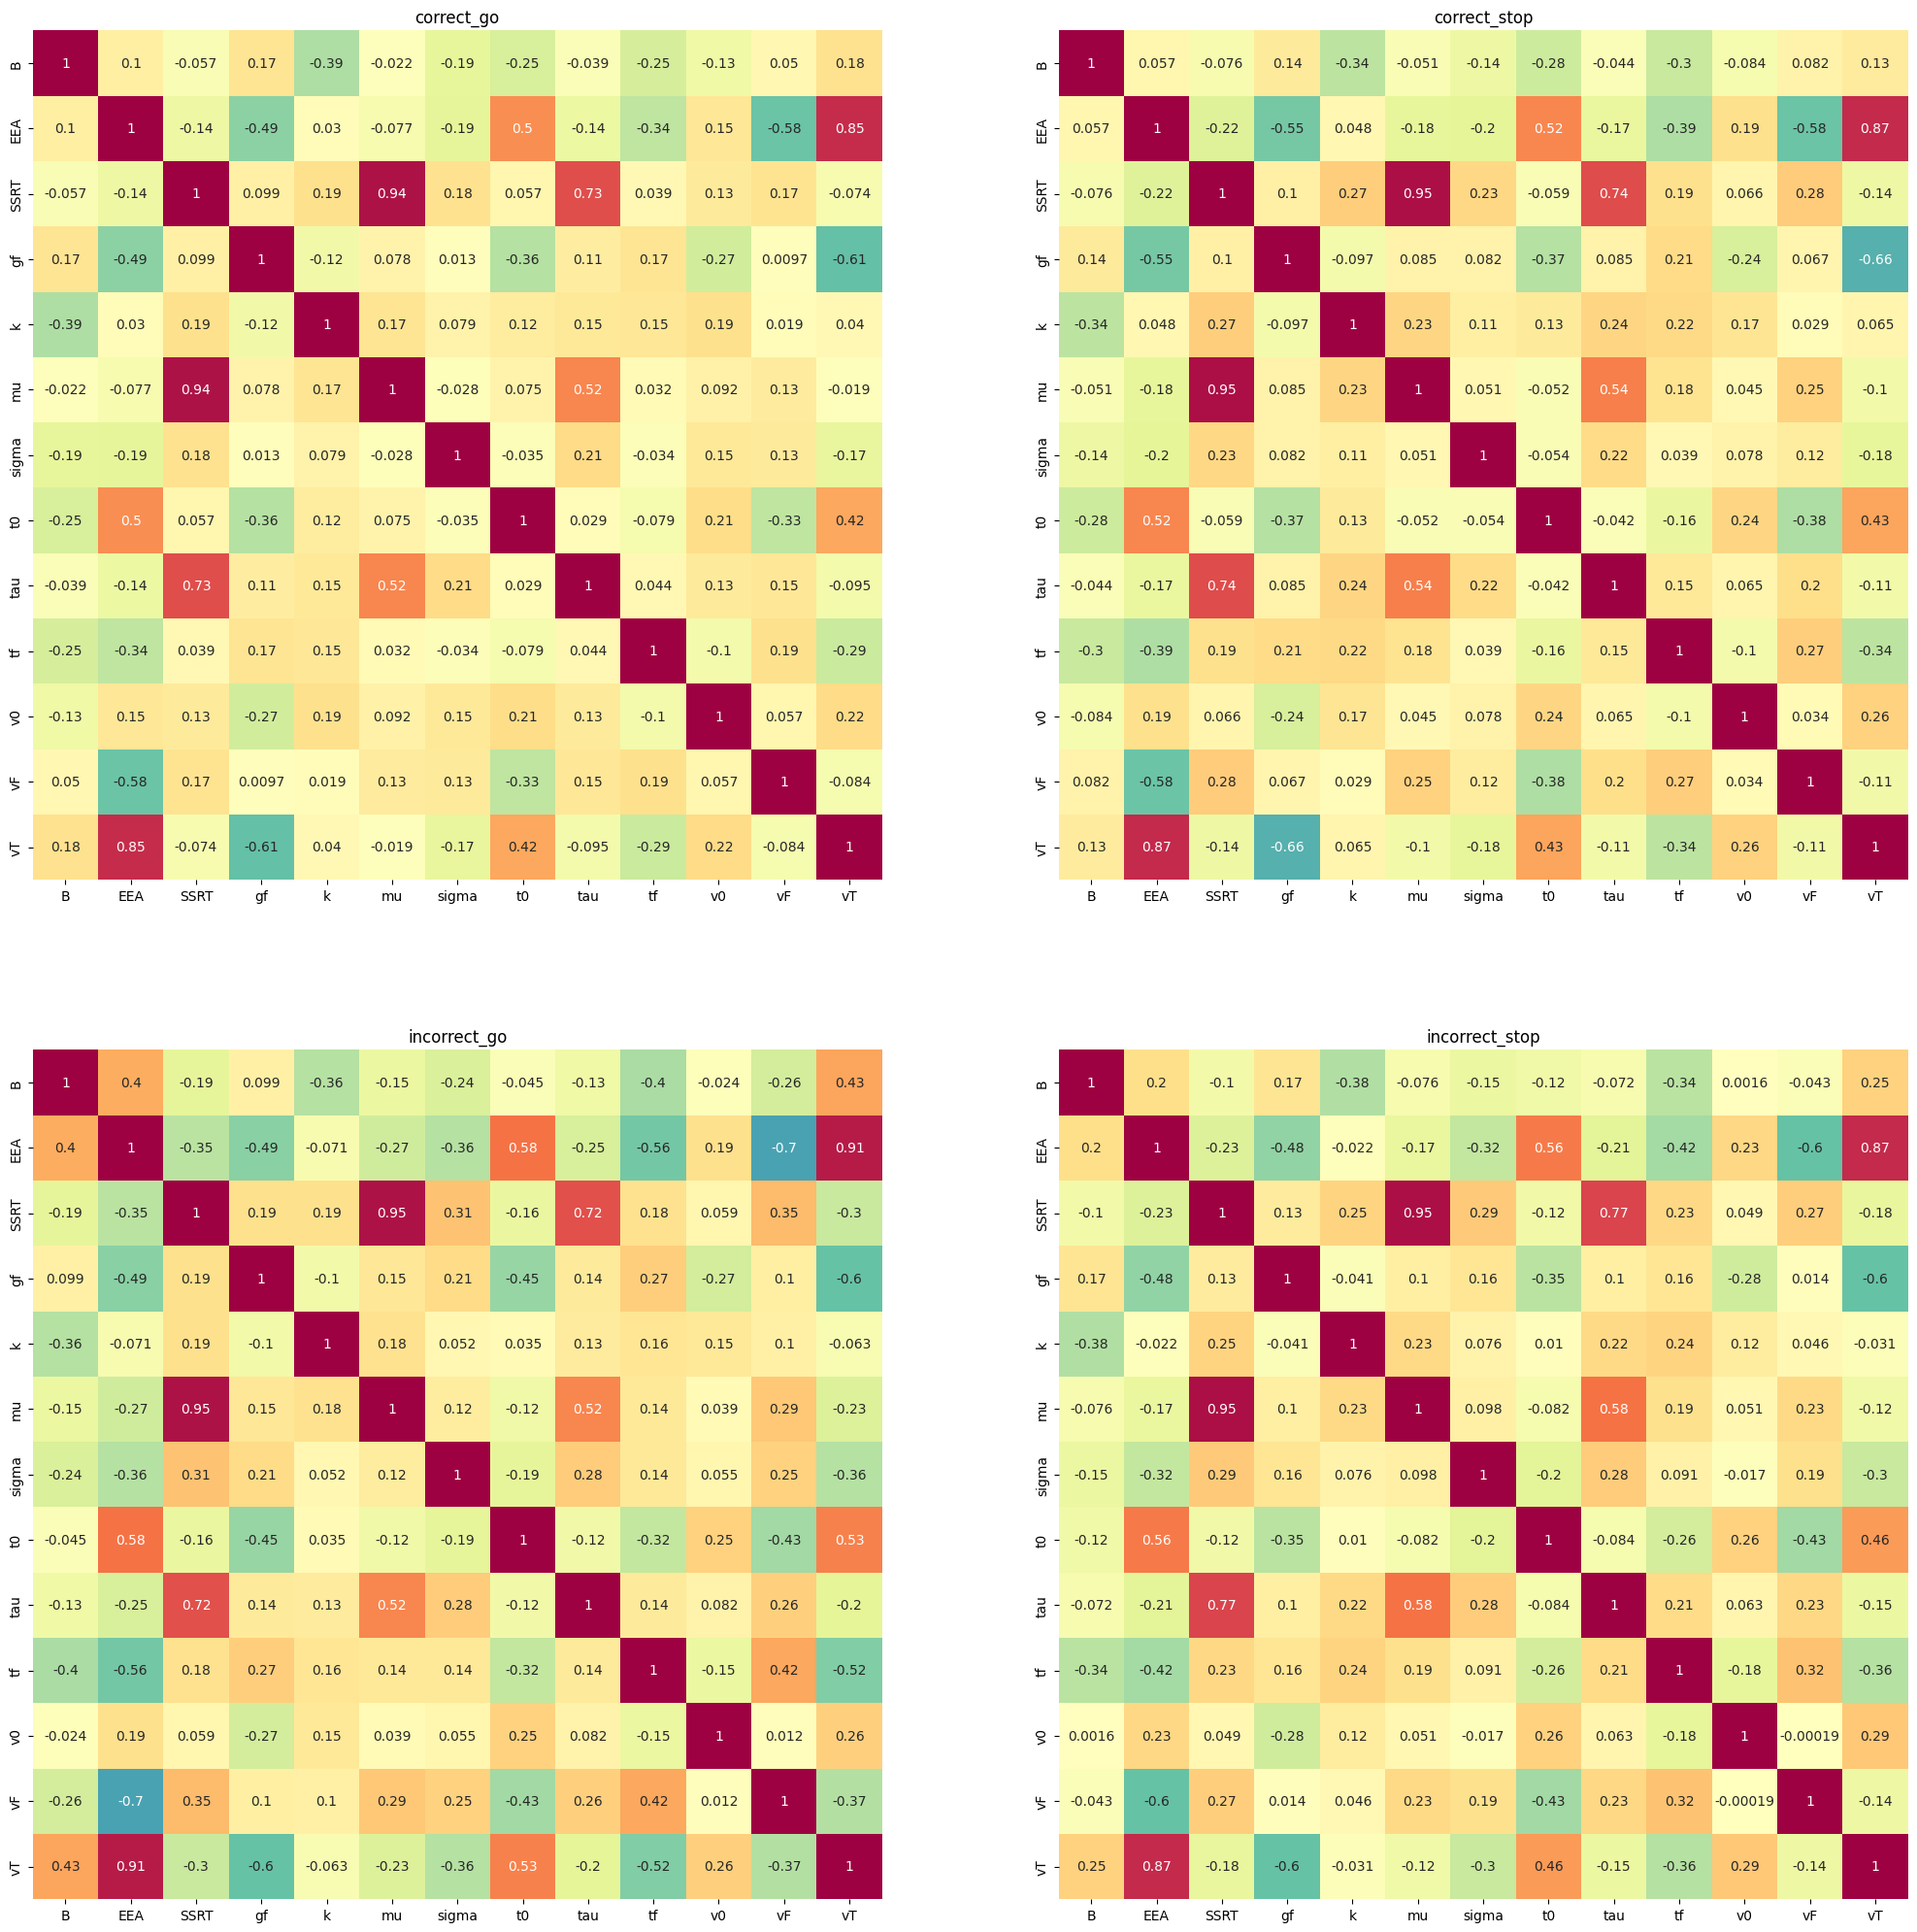

In [9]:

make_brainmap_correlation_plot(df, columns='target', index=['condition', 'variable'], nrows=2, ncols=2)

In [10]:
eea_tf = (parameters
          .reset_index()
          .filter(items = ['condition', 'EEA', 'tf'])
    )
unique_conditions = pd.unique(eea_tf['condition'])

for c in unique_conditions:

    tmp = eea_tf[eea_tf['condition'] == c]

    r, p = stats.pearsonr(tmp['EEA'], tmp['tf'])

    print(f'condition: {c}, r={r}, p={p}')


condition: correct_go, r=-0.33583401945520275, p=0.0
condition: correct_stop, r=-0.3898961397563919, p=0.0
condition: incorrect_go, r=-0.5594072822304936, p=0.0
condition: incorrect_stop, r=-0.4206014010982182, p=0.0


In [11]:
maps = catalog.load('weigard_map')

maps

[06/07/24 12:47:47] INFO     Loading data from 'weigard_map' (CSVDataSet)...                    ]8;id=899470;file:///Users/tony/anaconda3/envs/sst-rdex/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=674389;file:///Users/tony/anaconda3/envs/sst-rdex/lib/python3.10/site-packages/kedro/io/data_catalog.py#345\345]8;;\

,B,t0,gf,mu,sigma,tau,tf,vT,vF,v0,k,tf.natural,gf.natural,EEA,SSRT
subjectkey,,,,,,,,,,,,,,,
NDAR_INVR668RXK7,1.108892,0.189058,-1.792470,0.265801,0.041232,0.028712,-0.788501,2.817425,0.097257,2.454976,3.541961,0.215202,0.036529,2.720168,0.294493
NDAR_INVR69CJC9E,1.615399,0.100324,-1.423669,0.227705,0.112163,0.032474,-1.086456,2.808729,0.014304,2.247368,2.914694,0.138639,0.077271,2.794425,0.269826
NDAR_INVR6CE8KZ5,1.105218,0.202708,-2.026253,0.225694,0.071232,0.005426,-1.484695,3.238603,0.010647,3.096443,2.358129,0.068812,0.021369,3.227957,0.231409
NDAR_INVR6FAP3A7,1.538217,0.100140,-2.506967,0.253280,0.021573,0.026510,-2.071045,3.311128,0.578330,3.319068,2.692109,0.019177,0.006089,2.732798,0.279519
NDAR_INVR6HHHKR9,1.735796,0.211135,-1.980067,0.228580,0.023380,0.005745,-2.246401,3.696737,0.260613,2.783391,2.976325,0.012339,0.023848,3.436125,0.233973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDAR_INV8CY1MFAT,1.305924,0.167039,-2.562269,0.227173,0.020132,0.023979,-2.214529,4.207948,0.194690,2.651076,3.325927,0.013396,0.005200,4.013258,0.251360
NDAR_INV8D63FJKZ,1.189378,0.112034,-1.599756,0.244654,0.032164,0.000944,-2.297835,2.845304,0.090324,2.486248,2.163982,0.010786,0.054826,2.754980,0.245621
NDAR_INV8D7K7HYL,1.489319,0.111968,-1.436100,0.239185,0.055823,0.010040,-2.183292,2.956136,1.024828,2.418642,2.286905,0.014507,0.075487,1.931309,0.248641


In [12]:
from scipy.stats import pearsonr
def corrfunc(x, y, ax=None, **kws):
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'r = {r:.2f}', xy=(.6, .9), xycoords=ax.transAxes)

def make_parameter_correlation_plot(df):
    drop_cols = ['tf.natural', 'gf.natural']
    df= df.drop(columns=drop_cols)

    g = sns.PairGrid(df, corner=True, diag_sharey=False)
    g = g.map_lower(sns.regplot, scatter_kws={'alpha': 0.05})
    g = g.map_diag(sns.histplot)
    g = g.map_lower(corrfunc)

    plt.savefig('data/08_reporting/parameter_correlations.png', dpi=300, bbox_inches='tight')


In [13]:
grouped = make_parameter_correlation_matrix(df, columns='target', index=['condition', 'variable'])
list(grouped)

[('correct_go',
           condition         B       EEA      SSRT        gf         k  \
  target                                                                 
  B       correct_go  1.000000  0.103890 -0.056723  0.165196 -0.385983   
  EEA     correct_go  0.103890  1.000000 -0.139038 -0.489095  0.029859   
  SSRT    correct_go -0.056723 -0.139038  1.000000  0.099034  0.187849   
  gf      correct_go  0.165196 -0.489095  0.099034  1.000000 -0.116831   
  k       correct_go -0.385983  0.029859  0.187849 -0.116831  1.000000   
  mu      correct_go -0.022155 -0.077184  0.941328  0.078041  0.170096   
  sigma   correct_go -0.187101 -0.194470  0.180441  0.012899  0.078931   
  t0      correct_go -0.247665  0.497659  0.057249 -0.362605  0.120957   
  tau     correct_go -0.039497 -0.143571  0.731305  0.109425  0.146820   
  tf      correct_go -0.250368 -0.335834  0.039100  0.166224  0.153085   
  v0      correct_go -0.130588  0.154493  0.133046 -0.267034  0.194721   
  vF      correct_go  

In [56]:


def _get_brain_vector(df, condition, target):

    idx = ['condition', 'target']
    df = (df[(df['condition'] == condition) & 
        (df['target'] == target)]
            .set_index(idx)
            .melt()
            .drop(columns='variable')
            .rename(columns={'value':f'{condition}_{target}'})
    ) 
    return df





In [30]:
def make_two_parameter_correlation_plot(df_maps, df_brain, alpha=0.01,
                                        fpath='./data/08_reporting/'):

    df_brain = get_two_parameter_brainmaps(df_brain)
    print(df_brain.corr())
    scatter_kws = {'alpha': alpha}
    fig, axs = plt.subplots(1,2, figsize=(7, 3))
    ax = axs[0]
    sns.regplot(
        data=df_maps,
        x='tf',
        y='EEA',
        scatter_kws=scatter_kws,
        color="#440154FF",
        ax=ax
    )
    corrfunc(maps['tf'], maps['EEA'], ax=ax)
    ax.set_xlabel('$P_{tf}$')
    ax.set_title('Parameter Correlation')

    ax = axs[1]
    x = df_brain.iloc[:, 1] 
    y = df_brain.iloc[:, 0]
    sns.regplot(
        data=df_brain,
        x=x,
        y=y,
        scatter_kws=scatter_kws,
        color="#22A884FF",
        ax=ax
    )
    corrfunc(x, y, ax=ax)
    ax.set_title('Brain Map Correlation')

    for ax in axs:

        ax.tick_params(left=False, bottom=False)
        ax.set_xticks([])
        ax.set_yticks([])
    
    # fpath = f'{fpath}tf_eea_correlation.svg'
    # plt.savefig(fpath, bbox_inches='tight')

# make_two_parameter_correlation_plot(maps, df)





In [43]:
from sst_rdex_brain.pipelines.produce_plots.rdex_predict_plots import *

In [90]:
full = load_reg_coef(df_fdr)
pd.unique(full['target'])

array(['Go evidence threshold ($B$)', 'Efficiency of evidence acc. (EEA)',
       'Model derived SSRT', 'Correct-Go response time (RT)',
       'Go choice accuracy', 'Correct-Go RT variability',
       'Probability of Go failure ($p_{gf}$)', 'Empirical SSRT',
       'Perceptual Growth Rate ($g$)',
       'Stop ExGaussian normal mean  ($\\mu$)',
       'Stop ExGaussian normal SD ($\\sigma$)',
       'Non-decision time ($t_0$)',
       'Stop ExGaussian exponential mean ($\\tau$)',
       'Probability of trigger failure ($p_{tf}$)', 'Go urgency ($v_0$)',
       'Go mismatch rate ($v_-$)', 'Go match rate ($v_+$)'], dtype=object)

In [100]:

def get_two_parameter_brainmaps(df, condition1='Correct Go', condition2='Correct Stop',
                                target1='Efficiency of evidence acc. (EEA)',
                                  target2='Probability of trigger failure ($p_{tf}$)',
                                names=['EEA: Correct Go', '$P_{tf}$: Correct Stop']):
    
    df1 = _get_brain_vector(df, condition1, target1)
    df2 = _get_brain_vector(df, condition2, target2)

    out = pd.concat([df1, df2], axis=1)
    out.columns = names

    return out
# df_brain = get_two_parameter_brainmaps(full)
# df_brain

In [102]:
catalog.load('map_model_contribution_scores')

[06/07/24 13:58:36] INFO     Loading data from 'map_model_contribution_scores' (CSVDataSet)...  ]8;id=404690;file:///Users/tony/anaconda3/envs/sst-rdex/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=524701;file:///Users/tony/anaconda3/envs/sst-rdex/lib/python3.10/site-packages/kedro/io/data_catalog.py#345\345]8;;\

0      avg_activation
1      avg_activation
2      avg_activation
3      avg_activation
4        avg_reg_coef
            ...      
203                 p
204            t_stat
205            t_stat
206            t_stat
207            t_stat
Name: metric, Length: 208, dtype: object

In [120]:
def brainmap_correlation_diagnostic(df, ax):

    df_brain = get_two_parameter_brainmaps(df)
    df_brain[df_brain == 0] = np.NaN
    df_brain = df_brain.dropna()

    x = df_brain.iloc[:, 1] 
    y = df_brain.iloc[:, 0]
    sns.regplot(
        x=x,
        y=y,
        scatter_kws={'alpha':0.1},
        ax=ax
    )
    corrfunc(x, y, ax=ax)





[06/07/24 14:10:09] INFO     Loading data from 'map_model_contribution_scores' (CSVDataSet)...  ]8;id=537209;file:///Users/tony/anaconda3/envs/sst-rdex/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=308655;file:///Users/tony/anaconda3/envs/sst-rdex/lib/python3.10/site-packages/kedro/io/data_catalog.py#345\345]8;;\

[06/07/24 14:10:10] INFO     Loading data from 'params:target_map' (MemoryDataSet)...           ]8;id=776364;file:///Users/tony/anaconda3/envs/sst-rdex/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=668993;file:///Users/tony/anaconda3/envs/sst-rdex/lib/python3.10/site-packages/kedro/io/data_catalog.py#345\345]8;;\

[06/07/24 14:11:19] INFO     Loading data from 'map_model_contribution_scores' (CSVDataSet)...  ]8;id=460129;file:///Users/tony/anaconda3/envs/sst-rdex/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=600715;file:///Users/tony/anaconda3/envs/sst-rdex/lib/python3.10/site-packages/kedro/io/data_catalog.py#345\345]8;;\

[06/07/24 14:11:20] INFO     Loading data from 'params:target_map' (MemoryDataSet)...           ]8;id=391741;file:///Users/tony/anaconda3/envs/sst-rdex/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=635186;file:///Users/tony/anaconda3/envs/sst-rdex/lib/python3.10/site-packages/kedro/io/data_catalog.py#345\345]8;;\

[06/07/24 14:11:21] INFO     Loading data from 'map_model_contribution_scores' (CSVDataSet)...  ]8;id=860050;file:///Users/tony/anaconda3/envs/sst-rdex/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=648936;file:///Users/tony/anaconda3/envs/sst-rdex/lib/python3.10/site-packages/kedro/io/data_catalog.py#345\345]8;;\

[06/07/24 14:11:22] INFO     Loading data from 'params:target_map' (MemoryDataSet)...           ]8;id=967718;file:///Users/tony/anaconda3/envs/sst-rdex/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=10906;file:///Users/tony/anaconda3/envs/sst-rdex/lib/python3.10/site-packages/kedro/io/data_catalog.py#345\345]8;;\

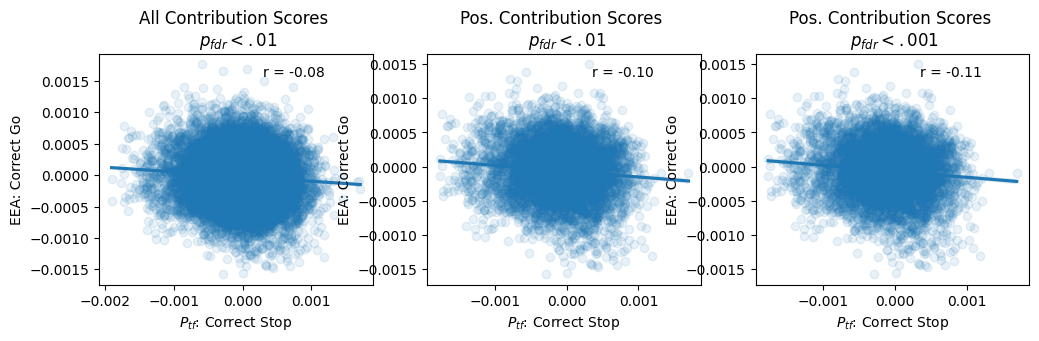

In [124]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))


df_fdr, df = filter_contribution_scores(
    catalog.load('map_model_contribution_scores'),
    catalog.load('params:target_map'),
    threshold=0.01)


pos, neg = separate_by_activation_direction(df, df_fdr)

axs[0].set_title("All Contribution Scores \n $p_{fdr}<.01$")
brainmap_correlation_diagnostic(load_reg_coef(df_fdr), axs[0])
axs[1].set_title("Pos. Contribution Scores \n $p_{fdr}<.01$")
brainmap_correlation_diagnostic(pos, axs[1])

df_fdr_small, df_small = filter_contribution_scores(
    catalog.load('map_model_contribution_scores'),
    catalog.load('params:target_map'),
    threshold=0.001)


pos, neg = separate_by_activation_direction(df_small, df_fdr_small)
axs[2].set_title("Pos. Contribution Scores \n $p_{fdr}<.001$")
brainmap_correlation_diagnostic(pos, axs[2])

plt.savefig('../data/08_reporting/brainmap_correlation_diag.png', dpi=300, bbox_inches='tight')


,target,metric,condition,lh_0,lh_1,lh_10,lh_100,lh_1000,lh_10000,lh_10001,...,rh_9990,rh_9991,rh_9992,rh_9993,rh_9994,rh_9995,rh_9996,rh_9997,rh_9998,rh_9999
0,NaN,avg_activation,Correct Go,0.000035,1.862040e-07,8.662803e-07,-1.950811e-05,5.830989e-06,0.000018,0.000019,...,-1.602693e-05,-1.447862e-05,-8.295956e-06,-0.000003,-6.385958e-07,-5.219156e-07,-0.000001,-0.000001,0.000002,4.634627e-06
1,NaN,avg_activation,Correct Stop,0.000014,1.229299e-05,1.446386e-05,-6.150648e-06,1.537880e-05,0.000036,0.000037,...,-7.802796e-06,-4.340420e-06,-1.212616e-07,0.000006,3.454952e-06,7.510253e-06,0.000010,0.000012,0.000011,1.229088e-05
2,NaN,avg_activation,Incorrect Go,0.000025,2.016306e-06,3.809851e-06,-1.584850e-05,9.321412e-06,0.000010,0.000011,...,-1.328656e-05,-9.512217e-06,-6.618977e-06,-0.000005,-6.019071e-06,-6.360681e-06,-0.000006,-0.000007,-0.000004,-8.845349e-07
3,NaN,avg_activation,Incorrect Stop,0.000019,8.803037e-06,1.004313e-05,-6.480192e-06,1.528240e-05,0.000029,0.000030,...,-1.043629e-05,-7.020155e-06,-3.591363e-06,0.000002,-1.901868e-06,4.640369e-07,0.000002,0.000002,0.000003,5.012184e-06
4,Go evidence threshold ($B$),avg_reg_coef,Correct Go,0.000257,4.461256e-06,1.245842e-04,-1.300827e-04,-4.040209e-04,0.000319,-0.000036,...,-6.184255e-05,-2.653341e-06,-1.133565e-05,-0.000473,1.755304e-04,-1.700864e-04,-0.000210,-0.000170,-0.000051,-4.044583e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Go match rate ($v_+$),p,Incorrect Stop,0.000000,4.217373e-78,1.254436e-91,6.516970e-20,2.672059e-293,0.000000,0.000000,...,2.620232e-41,6.219175e-10,4.207993e-03,0.090077,5.181480e-02,6.425633e-01,0.081320,0.144920,0.020170,1.018270e-04
204,Go match rate ($v_+$),t_stat,Correct Go,-75.128070,4.007451e-01,-1.895797e+00,2.813929e+01,1.515554e+01,28.085227,28.705353,...,-2.006081e+01,-1.233302e+01,-6.281731e+00,-2.548339,-6.358099e-01,5.027048e-01,1.081782,1.151719,-1.731803,-3.407156e+00
205,Go match rate ($v_+$),t_stat,Correct Stop,36.788068,2.669014e+01,-3.049464e+01,9.196259e+00,3.925275e+01,56.730362,57.417954,...,-1.021612e+01,3.750120e+00,-9.325835e-02,4.781283,-3.457760e+00,-7.177645e+00,-9.450122,10.999142,-9.111628,-9.267527e+00
206,Go match rate ($v_+$),t_stat,Incorrect Go,-56.939018,4.343056e+00,-7.980677e+00,2.253208e+01,-2.291587e+01,16.849633,-17.505330,...,-1.652307e+01,-7.895864e+00,-5.018269e+00,-4.582402,6.109752e+00,6.142367e+00,5.740895,6.326968,3.144981,6.571664e-01
